In [1]:
import numpy as np
import pandas as pd
import os
import json
import pickle
import sys

sys.path.insert(0,'/workspace/lang-detect/')

In [2]:
with open('../data/lang_dict_full_word_3_4_5_gram.json', 'r') as f:
    lang_dict_n_gram = pickle.load(f)

In [3]:
print(len(lang_dict_n_gram['en'].keys()))
print(lang_dict_n_gram['en']['the'])

24208
5480


In [5]:
test_data, test_labels = [], []
with open("../../europarl.test", "r") as f:
    for line in f:
        line = line.split()
        test_data.append(" ".join(line[1:]))
        test_labels.append(line[0])
print(test_data[0], test_labels[0])

('"\xd0\x95\xd0\xb2\xd1\x80\xd0\xbe\xd0\xbf\xd0\xb0 2020" \xd0\xbd\xd0\xb5 \xd1\x82\xd1\x80\xd1\x8f\xd0\xb1\xd0\xb2\xd0\xb0 \xd0\xb4\xd0\xb0 \xd1\x81\xd1\x82\xd0\xb0\xd1\x80\xd1\x82\xd0\xb8\xd1\x80\xd0\xb0 \xd0\xbd\xd0\xbe\xd0\xb2 \xd0\xba\xd0\xbe\xd0\xbd\xd0\xba\xd1\x83\xd1\x80\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb5\xd0\xbd \xd0\xbc\xd0\xb0\xd1\x80\xd0\xb0\xd1\x82\xd0\xbe\xd0\xbd \xd0\xb8 \xd0\xb8\xd0\xb7\xd1\x85\xd0\xbe\xd0\xb4 \xd1\x81 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x82\xd0\xb8\xd0\xb7\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8f.', 'bg')


In [6]:
print(len(test_data))

21000


In [8]:
from src import utils

for i in range(len(test_data)):
    test_data[i] = utils.preprocess(test_data[i])

new_data = [0]*len(test_data)

for i in range(len(test_data)):
    new_data[i] = utils.create_full_word_and_multiple_n_gram(test_data[i], [3,4,5])

In [9]:
new_data[0]

'\xd0\x95\xd0\xb2\xd1\x80\xd0\xbe\xd0\xbf\xd0\xb0 \xd0\x95\xd0 \x95\xd0\xb2 \xd0\xb2\xd1 \xb2\xd1\x80 \xd1\x80\xd0 \x80\xd0\xbe \xd0\xbe\xd0 \xbe\xd0\xbf \xd0\xbf\xd0 \xbf\xd0\xb0 \xd0\x95\xd0\xb2 \x95\xd0\xb2\xd1 \xd0\xb2\xd1\x80 \xb2\xd1\x80\xd0 \xd1\x80\xd0\xbe \x80\xd0\xbe\xd0 \xd0\xbe\xd0\xbf \xbe\xd0\xbf\xd0 \xd0\xbf\xd0\xb0 \xd0\x95\xd0\xb2\xd1 \x95\xd0\xb2\xd1\x80 \xd0\xb2\xd1\x80\xd0 \xb2\xd1\x80\xd0\xbe \xd1\x80\xd0\xbe\xd0 \x80\xd0\xbe\xd0\xbf \xd0\xbe\xd0\xbf\xd0 \xbe\xd0\xbf\xd0\xb0 \xd0\xbd\xd0\xb5 \xd0\xbd\xd0 \xbd\xd0\xb5 \xd1\x82\xd1\x80\xd1\x8f\xd0\xb1\xd0\xb2\xd0\xb0 \xd1\x82\xd1 \x82\xd1\x80 \xd1\x80\xd1 \x80\xd1\x8f \xd1\x8f\xd0 \x8f\xd0\xb1 \xd0\xb1\xd0 \xb1\xd0\xb2 \xd0\xb2\xd0 \xb2\xd0\xb0 \xd1\x82\xd1\x80 \x82\xd1\x80\xd1 \xd1\x80\xd1\x8f \x80\xd1\x8f\xd0 \xd1\x8f\xd0\xb1 \x8f\xd0\xb1\xd0 \xd0\xb1\xd0\xb2 \xb1\xd0\xb2\xd0 \xd0\xb2\xd0\xb0 \xd1\x82\xd1\x80\xd1 \x82\xd1\x80\xd1\x8f \xd1\x80\xd1\x8f\xd0 \x80\xd1\x8f\xd0\xb1 \xd1\x8f\xd0\xb1\xd0 \x8f\xd0\xb1\xd0\xb

In [10]:
# Based on total occurence
output_labels = []
for i in range(len(new_data)):
    count = {}
    for key in lang_dict_n_gram.keys():
        count[key] = 0
    for token in new_data[i].split():
        for key in lang_dict_n_gram.keys():
            if token in lang_dict_n_gram[key]:
                count[key] += lang_dict_n_gram[key][token]
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [11]:
print(len(output_labels), len(test_labels))

(21000, 21000)


In [12]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 93.12857142857143)


In [13]:
# Based on 0-1 occurence
output_labels = []
for i in range(len(new_data)):
    count = {}
    for key in lang_dict_n_gram.keys():
        count[key] = 0
    for token in new_data[i].split():
        for key in lang_dict_n_gram.keys():
            if token in lang_dict_n_gram[key]:
                count[key] += 1
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [14]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 99.53809523809524)


#### **Accuracy based on 0-1 occurence is 99.53% which is less than full-word-4-gram model while if we include total frequency of each token, then the accuracy reduces to 93.12% which is better from corresponding full-word-4-gram model.**

In [16]:
# Test few cases where this model didn't work
num_case = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        print(new_data[i])
        print("Actual Language {0} | Predicted Language {1}".format(test_labels[i], output_labels[i]))
        count = {}
        for key in lang_dict_n_gram.keys():
            count[key] = 0
        for token in new_data[i].split():
            for key in lang_dict_n_gram.keys():
                if token in lang_dict_n_gram[key]:
                    count[key] += 1
        print(count)
        print("--------------------------------")
        num_case += 1
        if num_case == 5:
            break

co jsme jsm sme tím tí ím tehdy teh ehd hdy tehd ehdy dali dal ali najevo naj aje jev evo naje ajev jevo najev ajevo
Actual Language cs | Predicted Language fi
{'pl': 8, 'el': 4, 'fr': 11, 'bg': 3, 'nl': 11, 'ro': 12, 'pt': 13, 'de': 12, 'sv': 11, 'da': 12, 'lv': 11, 'cs': 15, 'lt': 10, 'en': 11, 'sk': 15, 'sl': 13, 'it': 11, 'et': 13, 'hu': 12, 'fi': 16, 'es': 12}
--------------------------------
jmenovali jme men eno nov ova val ali jmen meno enov nova oval vali jmeno menov enova noval ovali se william wil ill lli lia iam will illi llia liam willi illia lliam meyer mey eye yer meye eyer bernard ber ern rna nar ard bern erna rnar nard berna ernar rnard starie sta tar ari rie star tari arie stari tarie reginald reg egi gin ina nal ald regi egin gina inal nald regin egina ginal inald pike pik ike thomas tho hom oma mas thom homa omas thoma homas shaw sha haw james jam ame mes jame ames mcleish mcl cle lei eis ish mcle clei leis eish mclei cleis leish archibald arc rch chi hib iba bal al

#### **If we actually notice the difference between actual language and predicted language, we see very less difference in terms of occurence of words/trigrams which gives a sense of similarity in those languages. In some cases they are equal.**

In [17]:
# Lets check which language has most wrong predictions
wrong_pred = {}
for key in lang_dict_n_gram.keys():
    wrong_pred[key] = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        wrong_pred[test_labels[i]] += 1
print(wrong_pred)

{'pl': 0, 'el': 0, 'fr': 7, 'bg': 0, 'nl': 1, 'ro': 3, 'pt': 11, 'de': 5, 'sv': 4, 'da': 4, 'lv': 1, 'cs': 3, 'lt': 0, 'en': 8, 'sk': 15, 'sl': 4, 'it': 7, 'et': 10, 'hu': 0, 'fi': 0, 'es': 14}


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

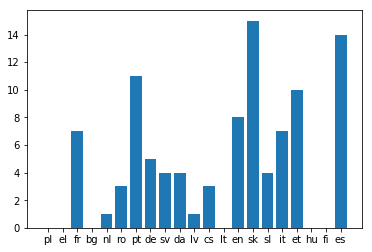

In [19]:
plt.bar(wrong_pred.keys(), wrong_pred.values())
plt.show()

The most number of mismatches happened with slovak(sk) - 15, Estonian(et) - 10, portugese(pt) - 11, italian(it) - 7, spanish(es) - 14. While bulgarian(bg), polish(pl), hungarian(hu), lithuanian(lt), finnish(fi) and greek(el) has true positive rate 1. 

In [20]:
# Convert the classes to numbers
classes_map = {}
classes = []
for ind, key in enumerate(count.keys()):
    classes_map[key] = ind
    classes.append(key)

test_labels_n, output_labels_n = [], []
for i in range(len(test_labels)):
    test_labels_n.append(classes_map[test_labels[i]])
    output_labels_n.append(classes_map[output_labels[i]])

Text(123,0.5,'True')

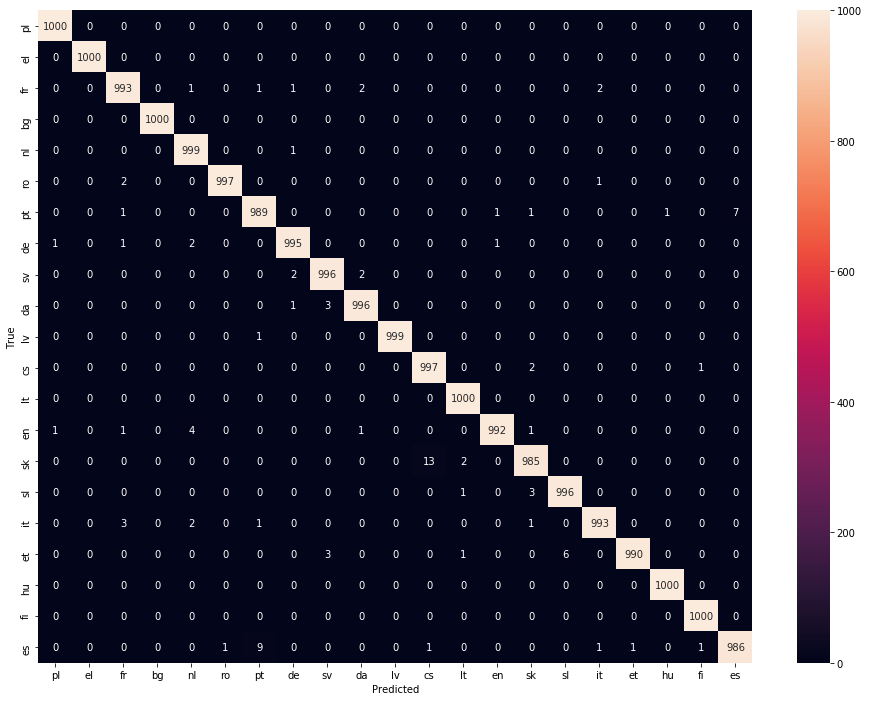

In [21]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels_n, output_labels_n)

import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(cnf_matrix, annot=True, fmt='g',ax=ax)
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.xlabel('Predicted')
plt.ylabel('True')

From confusion matrix we can seee that 42 English(en) sentences are classified as Dutch(nl). Lets see what are those sentences.

In [22]:
counter = 0
for i in range(len(output_labels)):
    if (output_labels[i] == 'nl') and (test_labels[i] == 'en'):
        print(test_data[i])
        print(new_data[i])
        print("----------------------------------------------")
        counter += 1
    if counter == 5:
        break

even half of that would be too much’ 
even eve ven half hal alf of that tha hat would wou oul uld woul ould be too much’ muc uch ch� h� ’ much uch� ch� h’ much� uch� ch’
----------------------------------------------
the same has happened under other circumstances 
the same sam ame has happened hap app ppe pen ene ned happ appe ppen pene ened happe appen ppene pened under und nde der unde nder other oth the her othe ther circumstances cir irc rcu cum ums mst sta tan anc nce ces circ ircu rcum cums umst msta stan tanc ance nces circu ircum rcums cumst umsta mstan stanc tance ances
----------------------------------------------
the short answer to this is ‘no’ 
the short sho hor ort shor hort answer ans nsw swe wer answ nswe swer answe nswer to this thi his is ‘no’ ‘ ��n �no no� o� ’ ‘n ��no �no� no� o’ ‘no ��no� �no� no’
----------------------------------------------
we must help others to help themselves 
we must mus ust help hel elp others oth the her ers othe ther hers other thers to

**Full word and 4-gram model is great. 5-gram, 4-gram, 3-gram and full words we have slightly reduced performance.**